# Random variable, stochastic process and simulation.

In [1]:
import numpy as np
import scipy as sp

from numpy.random import normal, choice, uniform

import ipywidgets as widgets
import matplotlib.pyplot as plt
plt.style.use('fast')

%matplotlib inline

## Random numbers, probability distribution and stat analysis

- The [**numpy.random**](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) has the fastest random number generators that are based on low level code written in C. 
- The [**Scipy.stats**](https://docs.scipy.org/doc/scipy/reference/stats.html ) has an extensive library of statistical distributions and tools for statistical analysis. 

- The [**Statsmodels**](https://www.statsmodels.org/stable/ ) Enhancing Scipy functionality with more tools
- The [**Seaborn**](https://docs.pymc.io/) library that enhances matplotlib functionality for stat visualization.  

## General overview of random numbers in python 

First we take a look at most widely used random numbers of numpy also called standard random numbers. These are rand (uniform random number on interval 0,1) and randn (stnadard normal random number with 0 mean and 1 variance). 

- When running code that uses random numbers results will always be different for every run. If you want code to reproduce same result you can fix the seed to get reproducible results: ```np.random.seed(8376743)```

$$f(x)=\begin{cases}
{\frac {1}{b-a}}&\mathrm {for} \ a\leq x\leq b,\\[8pt]0&\mathrm {for} \ x<a\ \mathrm {or} \ x>b
\end{cases}
$$

In [3]:
# Generates standard uniform random numbers U(0,1)
r = np.random.rand(10) 

r

array([0.5362313 , 0.5970277 , 0.31102422, 0.08405895, 0.53744025,
       0.32437404, 0.22298069, 0.0642688 , 0.74018628, 0.66086667])

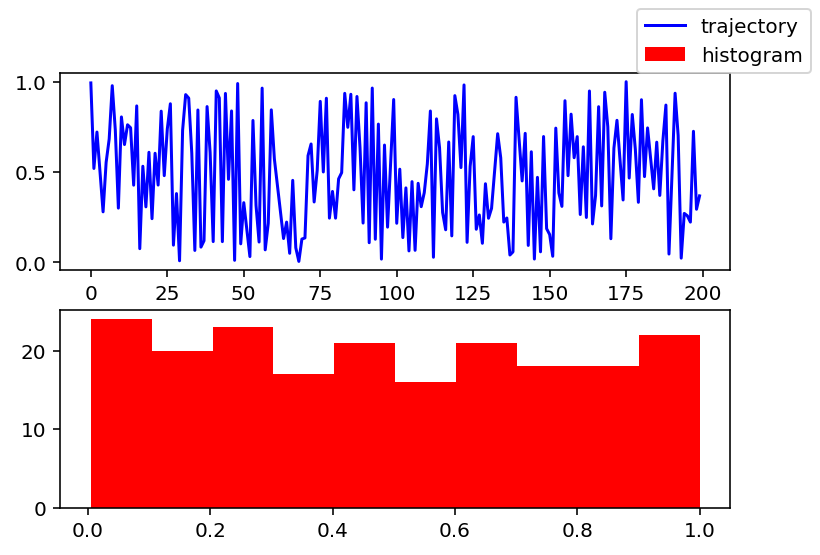

In [10]:
fig, ax = plt.subplots(nrows=2)

r = np.random.rand(200) 

ax[0].plot(r,  color='blue', label='trajectory')

ax[1].hist(r,  color='red',  label = 'histogram')

fig.legend();

In the same way we generate and visualize norally distributed random numbers, $N(0,1)$

$$P(x |\mu=0, \sigma=1) = \frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

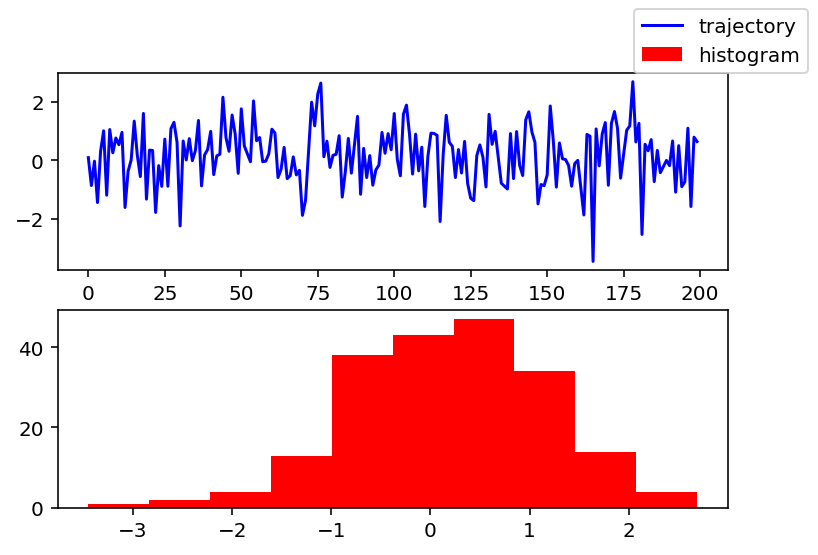

In [11]:
fig, ax = plt.subplots(nrows=2)

# Gene
r = np.random.randn(200) 

ax[0].plot(r,  color='blue', label='trajectory')

ax[1].hist(r,  color='red',  label = 'histogram')

fig.legend();

- We showed examples of standard random numbers $U(0,1)$ and $N(0,1)$

- Parametraized random number allow you to set parameters like value of mean and interval length and therefore can be viewed as generalized versions of standard random numbers. Below we take a look at examples of continuous (random and unofrm RVs) and discrete random numbers generated by paratmerized distributions. 

In [70]:
np.random.uniform(low=-1, high=1, size=(3, 4))

array([[-0.16754791,  0.08233649, -0.91302485,  0.85282806],
       [-0.73067654,  0.89723566, -0.65448719,  0.24989277],
       [-0.06749663, -0.32263093, -0.30756159, -0.22815058]])

In [71]:
np.random.normal(loc=8, scale=10, size=(4, 4))

array([[14.40060561,  6.72732876, 12.12802117,  3.71086233],
       [ 6.31174138, 22.61101452, 10.10724431, -2.51316013],
       [ 6.34958681, 19.63138669, 13.54579979, 13.87085956],
       [-1.94269205, 12.85816416, -1.38215072,  0.28403059]])

In [72]:
np.random.binomial(n=10, p=0.6, size=20) # This one is Binomial distributions. You can see it is discrete as  exepcted. 

array([7, 5, 4, 4, 9, 7, 6, 7, 6, 9, 5, 3, 7, 6, 2, 6, 7, 6, 7, 5])

### Using random numbers to get answers via simulations 

One of the major uses of random numbers is for conducting numerical simulations. What is a simulation? It is a recreation of a process on a computer. And this recreation is done by random numbers. E.g to simulate coint tosses, die throws, diffusion of molecules, conformational change of polymers we use random number to recreate the process on a computer. Let's start off by asking some simple questions

- How often do we get a run of 5 or more consecutive heads in 100 coin tosses if we repeat the experiment 1000 times?
<br>
- What if the coin is biased to generate heads only 40% of the time?

In [13]:
L = 100    # length of each trajectory
N = 1      # number of experiments: stochastic trajecotries generated

xs = np.random.choice([0,1], (L, N)) # (i) Unbiased coin p=[0.5,0.5] by default

ys = np.random.choice([0,1], (L, N), p=[0.9, 0.1])  # (ii) biased coin

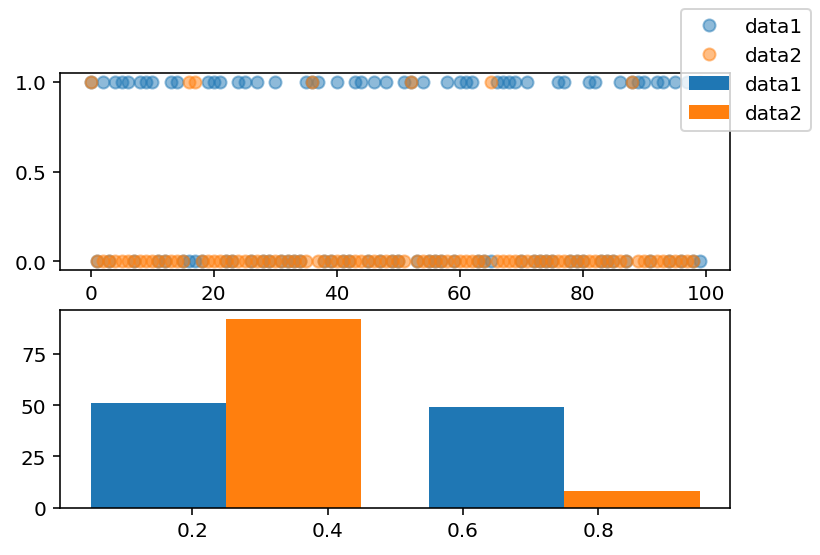

In [45]:
fig, ax = plt.subplots(nrows=2)

r = np.random.randn(200) 

ax[0].plot(xs, 'o', alpha=0.5, label  =  'data1')
ax[0].plot(ys, 'o', alpha=0.5, label =  'data2')

ax[1].hist((xs[:,0], ys[:,0]), 2, label = ("data1", "data2"))

fig.legend();

### Simple, discrete, unbiased random walk in 1D.

 Let's start off by simulating a random walk outlined in class by using a random number generators from numpy called choice and normal. Type help(np.random.choice) and help(np.random.normal) to learn more. 

```python
numpy.random.choice(A,size=(M,N,K)) 
``` 
returns element from a list of objects, **A** with uniform and equal probabilities (default) or with unqeual probabilities once supplied a list. Returend array can be a 1D, 2D or 3D aray of shape M,N,K.

In [77]:
choice(['bagel','muffin','croissant'], size=(3,5))

array([['bagel', 'croissant', 'muffin', 'muffin', 'croissant'],
       ['muffin', 'croissant', 'bagel', 'croissant', 'bagel'],
       ['croissant', 'croissant', 'muffin', 'croissant', 'bagel']],
      dtype='<U9')

* The <em>numpy.random.normal(mu,sigma,size=(M,N,K))</em> retruns random number distributed according to gausian probability function in the form of 1D, 2D or 3D arays of length N,M,K 

In [17]:
# Here we generate 3 sequences of normally distributed random variables of length 5
normal(0, 2, (3,5))

array([[-2.97637126, -1.81766529,  0.78035277,  0.88322928,  1.64951626],
       [ 3.52510937, -1.75169356,  0.83650062, -3.19859632, -0.63246506],
       [-0.86480825,  0.32538527, -2.69161384, -1.76025845,  2.6359338 ]])

### Simulating a 1D unbiased random walk 

In the course of simulating random walks we will be genreating multidimensional numpy arrays. We will adhere to a convnetion that:

- **Rows** are regarded as number of measurments, or **samples**
- **Columns** are regarded as number of observables **distinct measruments/trajectories**
- We then take **cumulative sum  over trajectory** [a,b,c,...], which accumulates random walker's position over time [a, a+b, a+b+c,...]. This is done by convenient ```np.cumsum()``` method.

In [27]:
def rw_1d(L, N):
    '''
    L: trajectory length
    N: Number of trajecotry
    returns np.array (L, N) shape 
    '''
    
    # Create random walks 
    r  = choice([-1,1], size=(L, N))
    
    #Accumulate position
    rw = r.cumsum(axis=0)

    #Set initial position 
    rw[0,:]=0 
    
    return rw

In [162]:
rw = rw_1d(2000, 1000)

print(rw.shape)
L = rw.shape[0]
N = rw.shape[1]

(2000, 1000)


Text(0, 0.5, 'histogram')

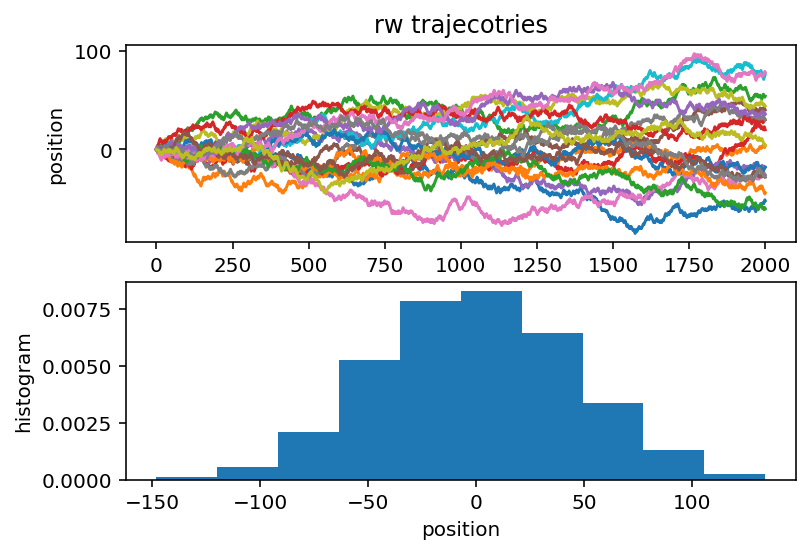

In [71]:
fig, ax = plt.subplots(nrows=2)

ax[0].plot(rw[:, 1:20])

ax[1].hist(rw[-1, :], density=True)

#
ax[0].set_ylabel('position')
ax[0].set_title('rw trajecotries');

ax[1].set_xlabel('position')
ax[1].set_ylabel('histogram')

### Statistics of random walk

In [74]:
from scipy.stats import norm 

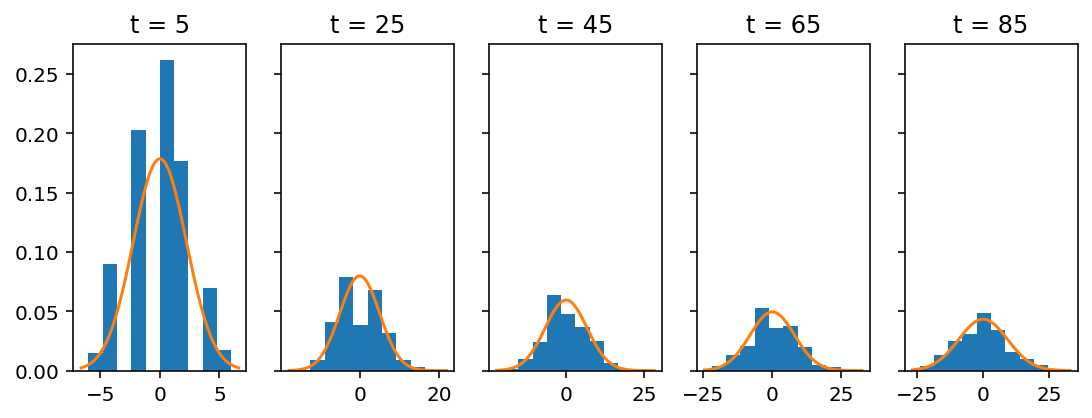

In [75]:
fig, ax = plt.subplots(1, 5, figsize=(9, 3), sharey=True) 

for i in range(5):  
    
    t = int(i*(L/5)) + 5                   # record dist at 5 equidist points
    
    ax[i].hist(rw[t,:], density=True)      # generate histogram at different points
    
    xmin, xmax = ax[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    
    y = norm.pdf(x, 0, np.sqrt(t))
    
    ax[i].plot(x,y)  
    
    ax[i].set_title(f"t = {t}")

### Connection with diffusion: Mean square displacement 


$$
\langle X(t)^2 \rangle^{1/2} = \frac{1}{n}\sum_{trajectories} X_n(t)^2  \sim t^{1/2}
$$

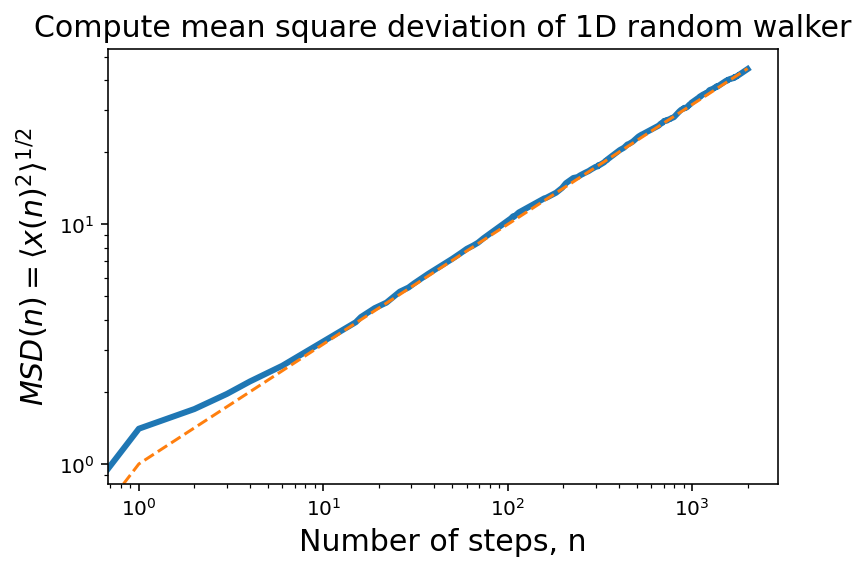

In [186]:
L, N = 2000, 1000
rw = rw_1d(L, N)

t = np.arange(L)
msd = np.mean(rw**2, axis=1)
rsd = msd**0.5

plt.loglog(np.arange(L), rsd, lw=3) 

plt.loglog(t, np.sqrt(t), '--')

plt.title('Compute mean square deviation of 1D random walker',fontsize=15)
plt.xlabel('Number of steps, n',fontsize=15)
plt.ylabel(r'$MSD(n)=\langle x(n)^2 \rangle^{1/2}$',fontsize=15);

**Questions**
- Compute MSD for 1D random walk show the expected scaling 
- Generate random walks from different positions
- choice between [-1,1] 
- Multinomial choice
- Self avoiding walks

In [176]:
def rw_2d(L, N):
    
    '''2d random walk function:
    L: trajectory length
    N: Number of trajecotry
    returns np.array with shape (L, N)
    '''
    verteces = np.array([(1,  0),
                         (0,  1),
                         (-1, 0),
                         (0, -1)])
    
    rw       = verteces[choice([0,1,2,3], size=(L, N))]
    
    rw[0, :, :] = 0
    
    return rw.cumsum(axis=0)

In [178]:
traj = rw_2d(L=10000, N=1000)

In [179]:
print(traj.shape)

(10000, 1000, 2)


**Compute room mean square distance of a random walker**

$$
\langle R(t)^2 \rangle^{1/2} = \langle (X(t)^2+Y(t)^2)\rangle^{1/2} \sim t^{1/2}
$$

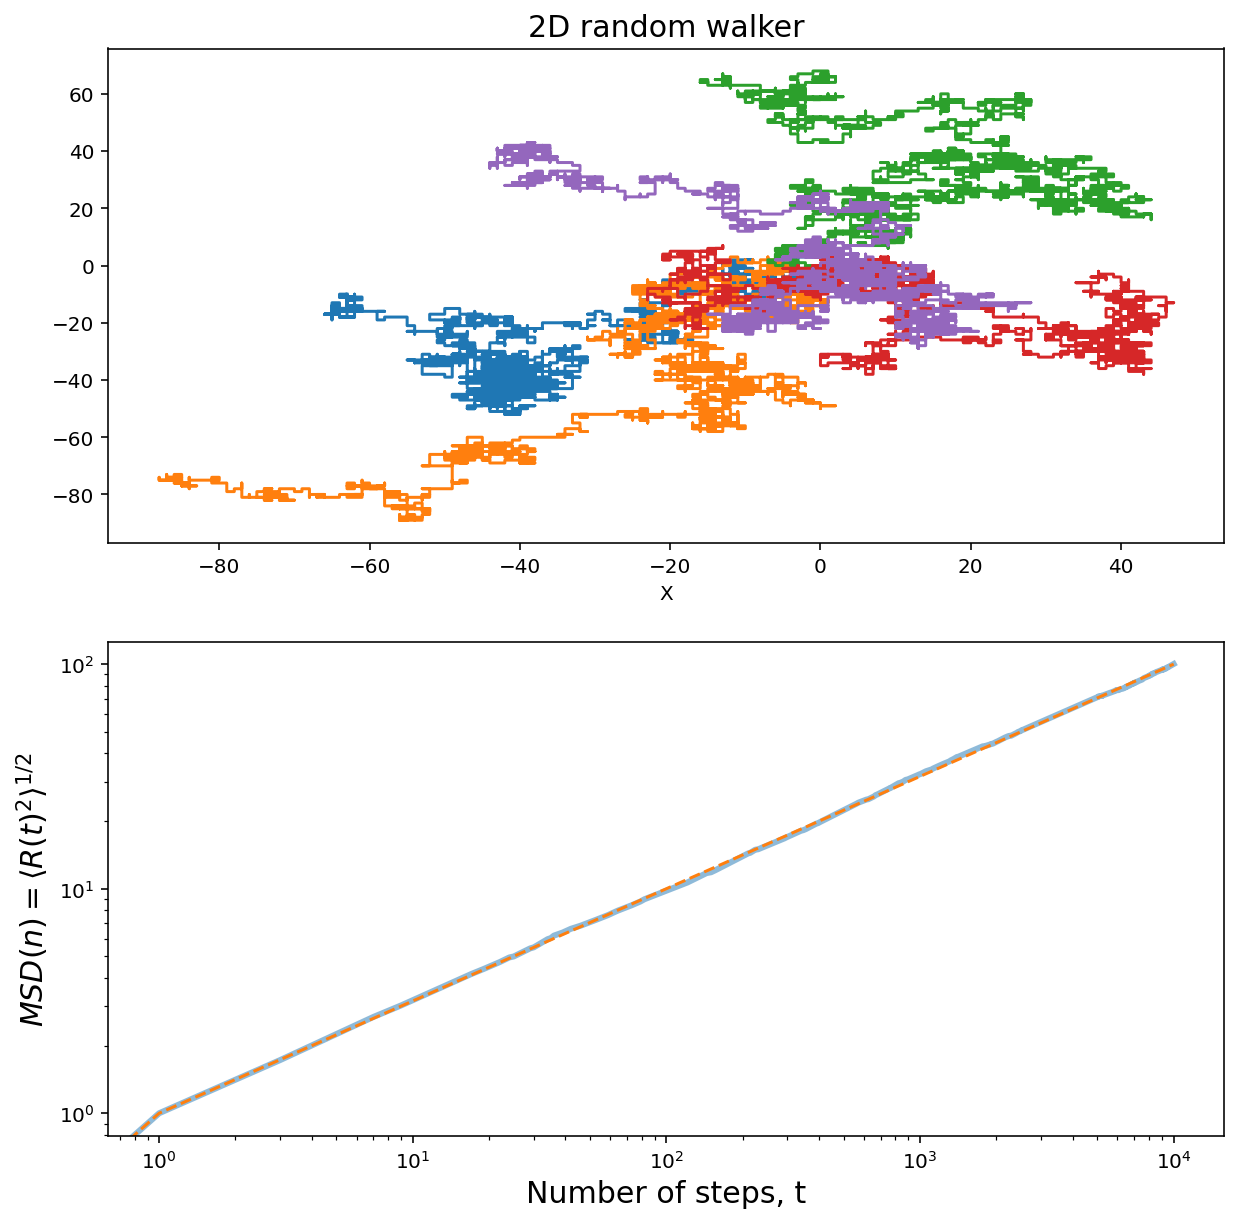

In [195]:
fig, ax  = plt.subplots(nrows=2, figsize=(10,10))

#Simulate 2D random walk
L, N = 10000, 1000
traj = rw_2d(L, N)

#Compute RSD 
t            = np.arange(L)
r2           = np.sum(traj**2, axis=2)
mean_r2      = np.mean(r2, axis = 1)
rsd          = np.sqrt(mean_r2)

ax[0].plot(traj[:3000, :5, 0], traj[:3000, :5, 1]);

ax[1].loglog(t, rsd, lw=3, alpha=0.5);
ax[1].loglog(t, t**0.5, '--');

ax[0].set_title('2D random walker',fontsize=15)
ax[0].set_xlabel('X')
ax[1].set_xlabel('Y')

ax[1].set_xlabel('Number of steps, t',fontsize=15)
ax[1].set_ylabel(r'$MSD(n)=\langle R(t)^2 \rangle^{1/2}$',fontsize=15);

### Binomial distribution of a random walker

- In previous example we started with random variables with no reference to probability distribution. 
    This time we will generate random numbers from a binomial distribution. 

- This time we will use scipy.stats library which contains probability distirbution functions. That is in addition to generating random variables we can also compute probability distributions and related quantities analytically. 

In [86]:
from scipy.stats import binom, norm, poisson  

In [87]:
s =  binom(10, 0.5) # Let us declare s to be a binomial RV

In [88]:
print(s.rvs(20))          # 20 random samples form X
print(s.pmf(5))           # P(X = 5)
print(s.cdf(5))           # P(X <= 5)
print(s.mean())           # E[X], mean
print(s.var())            # Var(X), variance
print(s.std())            # Std(X), standard deviation

[6 2 7 7 6 5 7 4 4 4 5 4 3 3 4 5 6 5 3 6]
0.24609375000000003
0.623046875
5.0
2.5
1.5811388300841898


In [89]:
def coin_flip(L,p,N):
    
    '''
    L: flip coint L times 
    q: with p probability
    N: Repeat experiment N times
    ''' 
    coin       = binom(L, p)   # Binomial RV
    
    coin_flips = coin.rvs(N)   # Generate sample of N points
    coin_pmf   = coin.pmf(np.arange(L+1)) # Generate PMF from 0 to L 
    coin_cdf   = coin.cdf(np.arange(L+1))
    
    return coin_flips, coin_pmf, coin_cdf

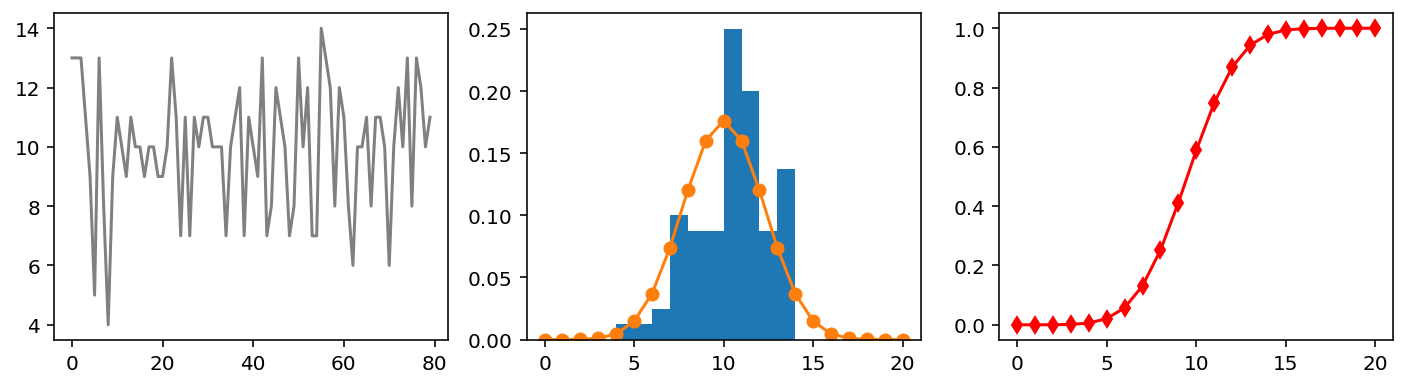

In [90]:
fig, ax=plt.subplots(nrows=1, ncols=3,figsize=(12,3))

#Coin flip 1 time.
X1, P1, CP1 = coin_flip(20, 0.5, 80)

ax[0].plot(X1,'-',color='grey')

ax[1].hist(X1,density=True)
ax[1].plot(P1,'-o')

ax[2].plot(CP1,'-d',color='red')

## Continuous time random walk:  Brownian motion

We have learned about random variables, random walk and have encorunetred a concept of stochastic process on the example of discrete step 1D random walk. Now let us generate the prototypical stochasic process in continuous time; the brownian motion. Brownian motion was first discoverd by a botanist Brown who noticed that a pollen in solution undergo erratic and incessant motion. To simulate brownian motion we take the continuous time limit of random walk and approximate dsiplacements of our particle as normally distributed (binomial->normal, time step->continuous time)

$$x(t+dt)-x(t)=N(0,\sqrt{2D dt})$$ 

We assume we have started at position $\mu=0$ and our variance is given by $\sigma^2=2Dt$ Where D is the diffusion coefficnets which is related to parameters of discree random walk as shown in the lecture.  

$$x(t+dt)=x(t)+\sqrt{2D dt} \cdot N(0,1)$$ 

In the last step we re-wrote brownian motion equation in a convenient way by shifting normally distributed radnom variable by $\mu$ and scaling it by $\sigma$ 

$$N(\mu, \sigma^2) = \mu + \sigma N(0,1) $$

In [2]:
def brown(T, N, dt=1, D=1):
    
    """
    Creates 3D brownian path given:
    time T 
    N=1 trajecotires
    dt=1 timestep
    D=1 diffusion coeff
    returns np.array with shape (N, T, 3)
    """
    
    nT = int(T/dt) # how many points to sample
    
    dR = np.sqrt(2*D*dt) * np.random.randn(N, nT, 3) # 3D position of brownian particle
    
    R = np.cumsum(dR, axis=1) # accumulated 3D position of brownian particle
    
    return R

### Brownian motion

- Below we proceed to simulate **continuous random walk** in 1D-3D

- We will plot trajecotires and distributions of brownian particle using interactive plotting via ipywidgets and holoviews/plotly interface.

In [3]:
R=brown(T=3000, N=1000)
print(R.shape)

(1000, 3000, 3)


In [45]:
@widgets.interact(t=(10,3000-1))
def brownian_plot(t=10):
    
    fig, ax = plt.subplots(ncols=2)
    
    ax[0].plot(R[:5, :t, 0].T, R[:5, :t, 1].T);
    
    ax[1].hist(R[:, 10, 0], density=True, color='red')
    ax[1].hist(R[:, t, 0], density=True)
    
    ax[1].set_ylim([0,0.1])
    
    ax[0].set_ylim([-200, 200])
    ax[0].set_xlim([-200, 200])
    
    fig.tight_layout()

interactive(children=(IntSlider(value=10, description='t', max=2999, min=10), Output()), _dom_classes=('widget…

In [7]:
import holoviews as hv
hv.extension('plotly')

plots = []
for i in range(10):
    
    plot = hv.Path3D(R[i,:,:], label='3D random walk').opts(width=600, height=600, line_width=5)
    plots.append(plot)
    
hv.Overlay(plots) 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Overlay
   .Path3D.A_3D_random_walk.I    :Path3D   [x,y,z]
   .Path3D.A_3D_random_walk.II   :Path3D   [x,y,z]
   .Path3D.A_3D_random_walk.III  :Path3D   [x,y,z]
   .Path3D.A_3D_random_walk.IV   :Path3D   [x,y,z]
   .Path3D.A_3D_random_walk.V    :Path3D   [x,y,z]
   .Path3D.A_3D_random_walk.VI   :Path3D   [x,y,z]
   .Path3D.A_3D_random_walk.VII  :Path3D   [x,y,z]
   .Path3D.A_3D_random_walk.VIII :Path3D   [x,y,z]
   .Path3D.A_3D_random_walk.IX   :Path3D   [x,y,z]
   .Path3D.A_3D_random_walk.X    :Path3D   [x,y,z]

In [46]:
rw_curve = [hv.Curve((R[i,:,0], R[i,:,1])) for i in range(10)]

xdist = hv.Distribution(R[:,10,0], ['X'], ['P(X)'])
ydist = hv.Distribution(R[:,10,1], ['Y'], ['P(Y)'])

hv.Overlay(rw_curve) << ydist << xdist

:AdjointLayout
   :Overlay
      .Curve.I    :Curve   [x]   (y)
      .Curve.II   :Curve   [x]   (y)
      .Curve.III  :Curve   [x]   (y)
      .Curve.IV   :Curve   [x]   (y)
      .Curve.V    :Curve   [x]   (y)
      .Curve.VI   :Curve   [x]   (y)
      .Curve.VII  :Curve   [x]   (y)
      .Curve.VIII :Curve   [x]   (y)
      .Curve.IX   :Curve   [x]   (y)
      .Curve.X    :Curve   [x]   (y)
   :Distribution   [Y]   (P(Y))
   :Distribution   [X]   (P(X))

### Diffusion Equation

The movement of individual random walkers $\leftrightarrow$ density of walkers $\rho(\vec{r},t)$

**Diffusion equation**:

Formulated empirically as [Fick's laws](https://en.wikipedia.org/wiki/Fick%27s_laws_of_diffusion)

$$\frac{\partial\rho}{\partial t} = \mathcal{D}\nabla^2\rho$$

- This is a 2nd order PDE! Unlike equations of motion diff eq shows irreersibile behaviour 
- This one exactly solvable. But in general reaction-diffusion PDEs difficult to solve analytically.
- Can solve numerically by writing derivatives as finite differences!
- Can also simulate via random walk!
- Diffusion coefficient $D$, Units $[L^2]/[T]$

Important special case solution (here written in 1d):

$$\rho(x,t) = \frac{1}{\sqrt{2\pi \sigma(t)^2}}\exp\left(-\frac{x^2}{2\sigma(t)^2}\right),$$

where $\sigma(t)=\sqrt{2{D}t}$

- density remains Gaussian
- Gaussian becomes wider with time
- check that this is indeed a solution by plugging into the diffusion equation!

In [15]:
def sigma(t, D = 1):
    return np.sqrt(2*D*t)

def gaussian(x, t):
    return  1/np.sqrt(2*np.pi*sigma(t)**2) * np.exp(-x**2/(2*sigma(t)**2)) #

In [81]:
@widgets.interact(t=(1,100,1))
def diffusion(t=0.001):
    
    R = brown(T=101, N=1000)
    x = np.linspace(-20, 20, 100)
    
    plt.plot(x, gaussian(x, 1), '--', color='orange', label='t=0')
    
    plt.plot(x, gaussian(x, t), lw=3, color='green', label=f't={t}')
    
    plt.hist(R[:,t,0], density=True, alpha=0.6, label='simulation hist')
    
    plt.legend()
    plt.ylabel('$p(x)$')
    plt.xlabel('$x$')
    plt.xlim([-25, 25])

interactive(children=(IntSlider(value=1, description='t', min=1), Output()), _dom_classes=('widget-interact',)…

## References

**The mighty little books**
-  ["Random Wlaks in Biology",  H Berg (1993)](https://www.amazon.com/Random-Walks-Biology-Howard-Berg/dp/0691000646)
-  ["Physical models of Living systems",  P Nelson (2015)](https://www.amazon.com/gp/product/1464140294/ref=ppx_yo_dt_b_search_asin_title?ie=UTF8&psc=1)
- ["Noise and fluctuations",  DKC MacDonald (2003)](https://www.amazon.com/Noise-and-Fluctuations-An-Introduction/dp/0486785157/ref=sr_1_1?keywords=fluctuation+noise&qid=1579882150&s=books&sr=1-1)
- ["Investigations on the Theory of the Brownian Movement", A Einstein (1956 preprint)](https://www.amazon.com/Investigations-Theory-Brownian-Movement-Physics/dp/0486603040/ref=sr_1_2?keywords=einstein+brownian&qid=1579882356&sr=8-2)

**More in depth**
 
 - ["Simple Brownian Diffusion: An Introduction to the Standard Theoretical Models", D Gillespie](https://www.amazon.com/Simple-Brownian-Diffusion-Introduction-Theoretical/dp/0199664501/ref=sr_1_1?keywords=diffusion+brownian&qid=1579882520&sr=8-1)
 - ["Stochastic Processes for Physicists" K Jacobs](https://www.amazon.com/Stochastic-Processes-Physicists-Understanding-Systems/dp/0521765420/ref=sr_1_1?keywords=kurt+jacobs+stochastic&qid=1579882738&sr=8-1)
 
**On the applied side**

- [Brownian Motion: Elements of Colloid Dynamics A P Philipse (2018)](https://www.amazon.com/Brownian-Motion-Elements-Dynamics-Undergraduate/dp/3319980521/ref=sr_1_7?keywords=einstein+brownian&qid=1579882356&sr=8-7)